<a href="https://colab.research.google.com/github/Elham-Esmaeelnia/predict-BTC-LinearRegression/blob/main/%D9%BE%DB%8C%D8%B4_%D8%A8%DB%8C%D9%86%DB%8C_%D9%82%DB%8C%D9%85%D8%AA_%D8%A8%DB%8C%D8%AA_%DA%A9%D9%88%DB%8C%D9%86_%D8%A8%D8%A7_%D8%B1%DA%AF%D8%B1%D8%B3%DB%8C%D9%88%D9%86_%D8%AE%D8%B7%DB%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install statsmodels

In [ ]:
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import mplfinance as mplf
import sklearn.metrics as met
import matplotlib.pyplot as plt
import pandas_datareader as pdt
import sklearn.linear_model as lm
import sklearn.preprocessing as pp
import statsmodels.graphics.tsaplots as tsaplt

In [ ]:
np.random.seed(0)
plt.style.use('ggplot')

In [ ]:
Ticker = 'BTC-USD'
Interval = '1d'
Date1 = dt.datetime(2015, 1, 1)
Date2 = dt.datetime(2022, 1, 1)

In [ ]:
DF = yf.download(tickers=Ticker, interval=Interval, start=Date1, end=Date2)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
print(DF.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-01-01  320.434998  320.434998  314.002991  314.248993  314.248993   
2015-01-02  314.079010  315.838989  313.565002  315.032013  315.032013   
2015-01-03  314.846008  315.149994  281.082001  281.082001  281.082001   
2015-01-04  281.145996  287.230011  257.612000  264.195007  264.195007   
2015-01-05  265.084015  278.341003  265.084015  274.473999  274.473999   

              Volume  
Date                  
2015-01-01   8036550  
2015-01-02   7860650  
2015-01-03  33054400  
2015-01-04  55629100  
2015-01-05  43962800  


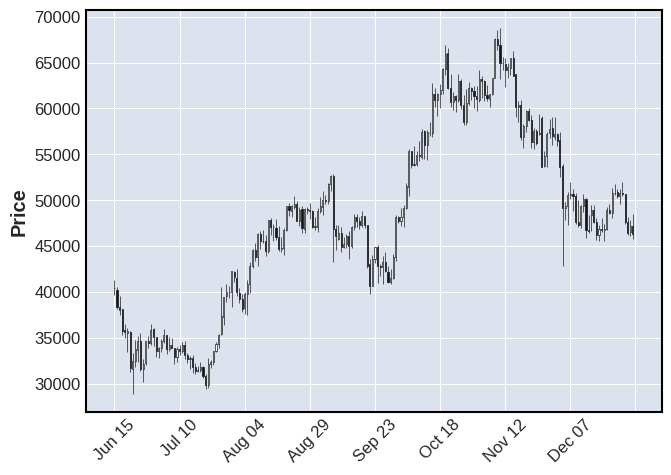

In [ ]:
mplf.plot(DF.iloc[-200:], type='candle')
plt.show()

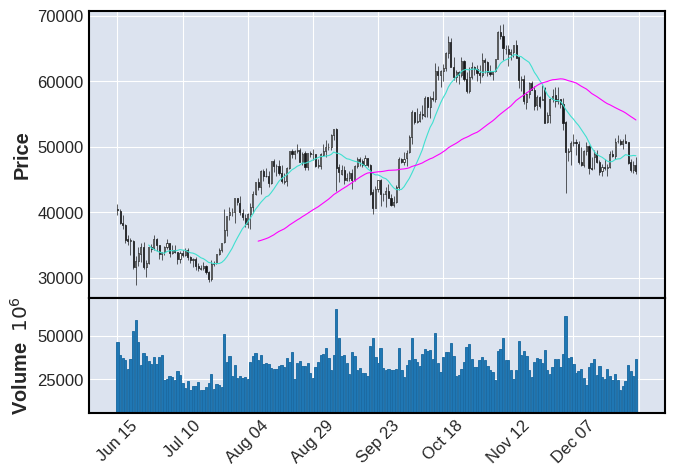

In [ ]:
mplf.plot(DF.iloc[-200:], type='candle', mav=(13, 55), volume=True)
plt.show()

In [ ]:
C = DF['Close'].to_numpy()

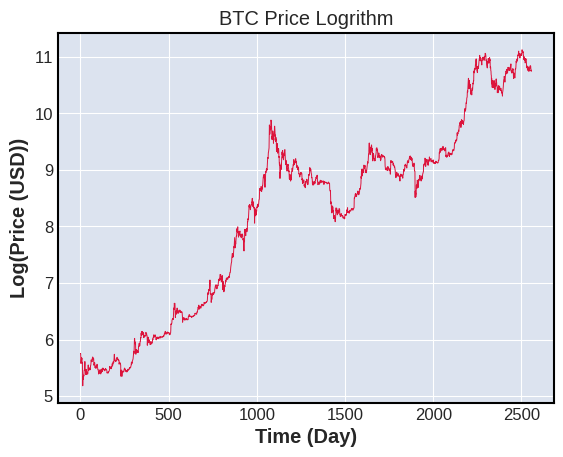

In [ ]:
S = np.log(C)
plt.plot(S, lw=0.7, c='crimson')
plt.title('BTC Price Logrithm')
plt.xlabel('Time (Day)')
plt.ylabel('Log(Price (USD))')
plt.show()

In [ ]:
def Lag(S:np.ndarray, L:int):
    nD0 = S.size
    nD = nD0 - L
    X = np.zeros((nD, L))
    Y = np.zeros((nD, 1))
    for i in range(nD):
        X[i, :] = S[i:i + L]
        Y[i, 0] = S[i + L]
    return X, Y

In [ ]:
nLag = 30
X0, Y0 = Lag(S, nLag)

In [ ]:
sTrain = 0.8
nDtr = int(sTrain * S.size)

In [ ]:
trX0 = X0[:nDtr]
teX0 = X0[nDtr:]
trY0 = Y0[:nDtr]
teY0 = Y0[nDtr:]

In [ ]:
SSX = pp.StandardScaler()
trX = SSX.fit_transform(trX0)
teX = SSX.transform(teX0)

SSY = pp.StandardScaler()
trY = SSY.fit_transform(trY0)
teY = SSY.transform(teY0)

In [ ]:
trY = trY.reshape(-1)
teY = teY.reshape(-1)

In [ ]:
Model = lm.LinearRegression()
Model.fit(trX, trY)

LinearRegression()

In [ ]:
def RegressionReport(Model, X:np.ndarray, Y:np.ndarray):
    P = Model.predict(X)

    MSE = met.mean_squared_error(Y, P)
    RMSE = MSE**0.5
    NRMSE = 100 * RMSE / (np.max(Y) - np.min(Y))
    MAE = met.mean_absolute_error(Y, P)
    MAPE = 100 * met.mean_absolute_percentage_error(Y, P)
    R2 = 100 * met.r2_score(Y, P)

    print(f'MSE:   {round(MSE, 4)}')
    print(f'RMSE:  {round(RMSE, 4)}')
    print(f'NRMSE: {round(NRMSE, 2)} %')
    print(f'MAE:   {round(MAE, 4)}')
    print(f'MAPE:  {round(MAPE, 2)} %')
    print(f'R2:    {round(R2, 2)} %')

In [ ]:
print('Model Regression Report on Train Dataset:')
RegressionReport(Model, trX, trY)
print('_'*60)
print('Model Regression Report on Test Dataset:')
RegressionReport(Model, teX, teY)

Model Regression Report on Train Dataset:
MSE:   0.0007
RMSE:  0.0272
NRMSE: 0.85 %
MAE:   0.0174
MAPE:  5.79 %
R2:    99.93 %
____________________________________________________________
Model Regression Report on Test Dataset:
MSE:   0.0008
RMSE:  0.0278
NRMSE: 2.07 %
MAE:   0.0203
MAPE:  1.06 %
R2:    99.48 %


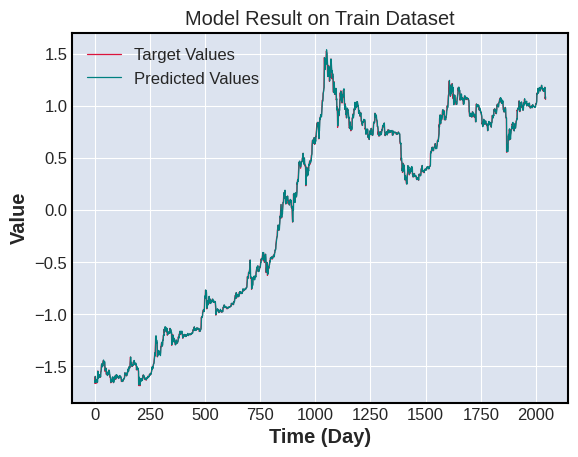

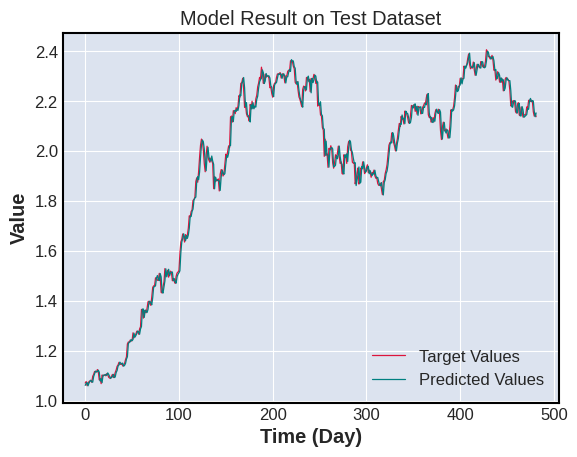

In [ ]:
trP = Model.predict(trX)
teP = Model.predict(teX)

plt.plot(trY, lw=0.9, c='crimson', label='Target Values')
plt.plot(trP, lw=0.9, c='teal', label='Predicted Values')
plt.title('Model Result on Train Dataset')
plt.xlabel('Time (Day)')
plt.ylabel('Value')
plt.legend()
plt.show()

plt.plot(teY, lw=0.9, c='crimson', label='Target Values')
plt.plot(teP, lw=0.9, c='teal', label='Predicted Values')
plt.title('Model Result on Test Dataset')
plt.xlabel('Time (Day)')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
W = Model.coef_
print(f'W:\n{W}')

W:
[ 3.85085656e-02 -2.12970764e-02 -1.32018216e-02 -1.73742361e-02
  2.32372440e-02  7.84408625e-03  2.77771441e-03 -1.63665719e-02
  2.86182044e-02 -5.37590174e-02 -2.75800327e-02  3.33104264e-02
 -2.84881334e-02  4.78432793e-02 -8.74206122e-03  6.57926217e-04
  5.50814701e-03 -1.02701076e-02  1.55468595e-03 -4.79477346e-02
  8.51125009e-02 -1.92177662e-02  2.00336599e-02 -7.87919424e-02
  2.65473175e-02  1.51454490e-02  2.64468737e-03 -1.27772555e-02
  4.59959045e-02  9.70078815e-01]


In [ ]:
trP0 = np.exp( SSY.inverse_transform( trP.reshape( (-1, 1) ) ) )
teP0 = np.exp( SSY.inverse_transform( teP.reshape( (-1, 1) ) ) )

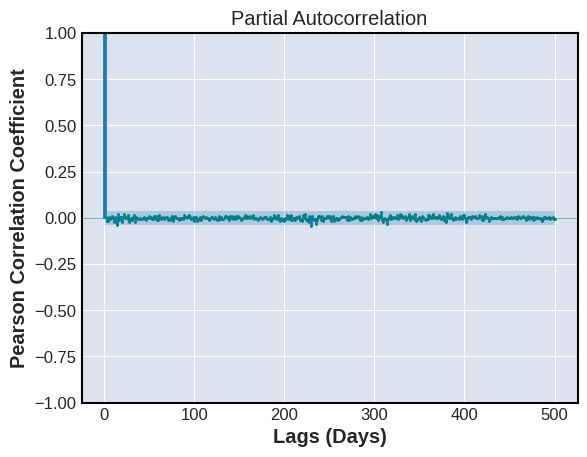

In [ ]:
tsaplt.plot_pacf(S, lags=500, c='teal', lw=0.4, markersize=1)
plt.xlabel('Lags (Days)')
plt.ylabel('Pearson Correlation Coefficient')
plt.show()